###Importing Libraries

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


###Loading and Resizing Image 

In [80]:
image = cv2.imread('/content/DeepLearningCat.jfif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

ReSized1 = cv2.resize(image, (960, 540))

###Converting an image to grayscale

In [81]:
grayScaleImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (960, 540))

###Applying median blur to smoothen an image

In [82]:
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (960, 540))

###Retrieving the edges

In [85]:
getEdge = cv2.adaptiveThreshold(grayScaleImage, 255, 
  cv2.ADAPTIVE_THRESH_MEAN_C, 
  cv2.THRESH_BINARY, 9, 9)
ReSized4 = cv2.resize(getEdge, (960, 540))

###Applying bilateral filter to remove noise 

In [86]:
colorImage = cv2.bilateralFilter(image, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (960, 540))

###Masking edged image with smoothened Image

In [87]:
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
ReSized6 = cv2.resize(cartoonImage, (960, 540))

###Plotting all transactions

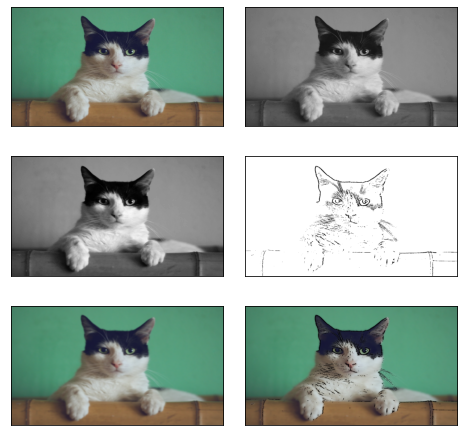

In [88]:
images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
plt.show()